In [3]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import scipy


import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout

from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix

from tensorflow.keras.preprocessing import image

In [5]:
pwd

'C:\\Users\\ivanb\\PycharmProjects\\pythonProject6'

In [6]:
my_data_dir='C:\\Users\\ivanb\\PycharmProjects\\pythonProject6\\dataset\\test_train'

Train | Test Split

In [7]:
# Directory where your data is located
data_dir = "C:\\Users\\ivanb\\PycharmProjects\\pythonProject6\\dataset\\flowers"

# Labels
labels = ["daisy", "dandelion", "rose", "sunflower", "tulip"]


file_names = []
labels_list = []

# Collect filenames and tags under each tag
for label in labels:
    label_dir = os.path.join(data_dir, label)
    for file_name in os.listdir(label_dir):
        file_names.append(os.path.join(label, file_name))
        labels_list.append(label)

# Split the data set into train and test
train_file_names, test_file_names, train_labels, test_labels = train_test_split(
    file_names, labels_list, test_size=0.2, random_state=42)

print("Train veri seti sayısı:", len(train_file_names))
print("Test veri seti sayısı:", len(test_file_names))

Train veri seti sayısı: 3453
Test veri seti sayısı: 864


In [8]:
train_dir = my_data_dir+'/train_data'
test_dir = my_data_dir+'/test_data'
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Saving the train dataset
for file_name, label in zip(train_file_names, train_labels):
    src_file = os.path.join(data_dir, file_name)
    dest_dir = os.path.join(train_dir, label)
    os.makedirs(dest_dir, exist_ok=True)
    shutil.copy(src_file, os.path.join(dest_dir, os.path.basename(file_name)))

# Saving the test dataset
for file_name, label in zip(test_file_names, test_labels):
    src_file = os.path.join(data_dir, file_name)
    dest_dir = os.path.join(test_dir, label)
    os.makedirs(dest_dir, exist_ok=True)
    shutil.copy(src_file, os.path.join(dest_dir, os.path.basename(file_name)))

In [9]:
os.listdir(my_data_dir)

['test_data', 'train_data']

In [10]:
train_path = my_data_dir+'/train_data/'
test_path = my_data_dir+'/test_data/'

In [11]:
os.listdir(train_path)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [12]:
os.listdir(test_path)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

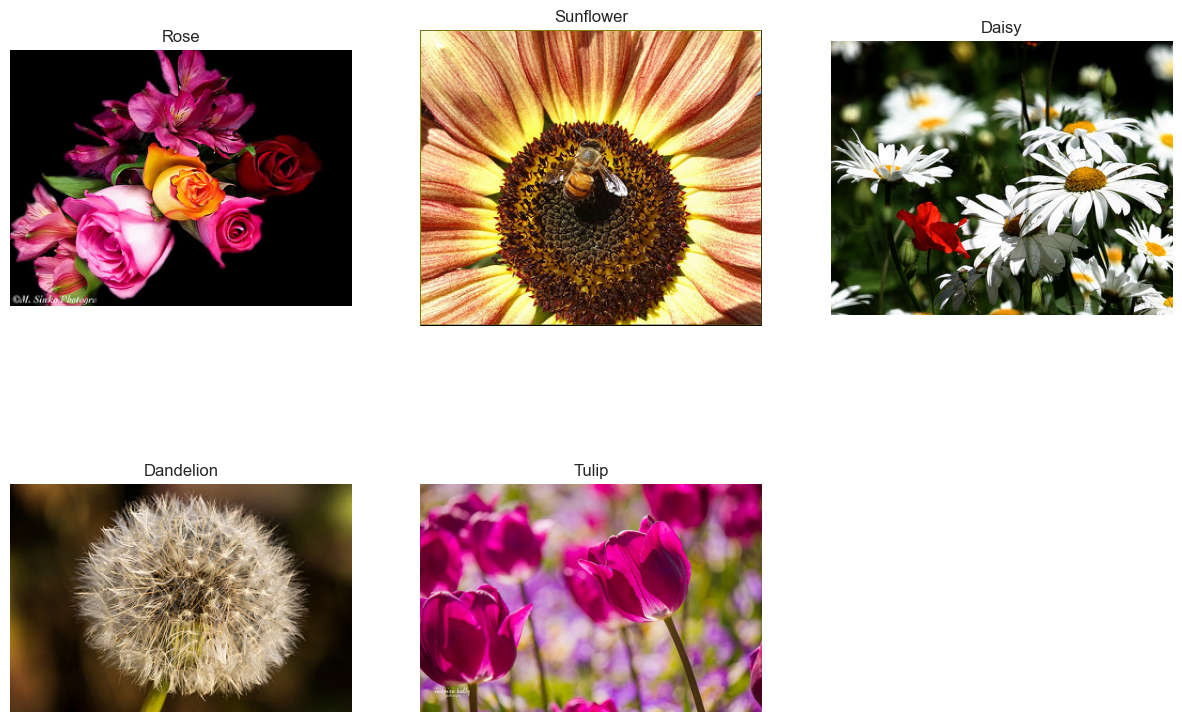

In [13]:
train_path = my_data_dir+'/train_data/'
flowers = ['rose', 'sunflower', 'daisy', 'dandelion', 'tulip']

plt.figure(figsize=(15, 10))

for i, flower in enumerate(flowers, start=1):
    # Construct the directory path for each flower type
    flower_path = os.path.join(train_path, flower)
    # Get the fifth image
    sample_image_name = os.listdir(flower_path)[5]
    sample_image_path = os.path.join(flower_path, sample_image_name)
    
    # Display the image
    plt.subplot(2, 3, i)
    plt.imshow(plt.imread(sample_image_path))
    plt.title(flower.capitalize())  
    plt.axis('off')  

plt.show()

In [14]:
roses =len(os.listdir(train_path+'rose'))
sunflowers =len(os.listdir(train_path+'sunflower'))
daisy =len(os.listdir(train_path+'daisy'))
dandelion =len(os.listdir(train_path+'dandelion'))
tulips =len(os.listdir(train_path+'tulip'))


print("Number of files in Roses folder:", roses)
print("Number of files in Sunflowers folder:", sunflowers)
print("Number of files in Daisy folder:", daisy)
print("Number of files in Dandelion folder:", dandelion)
print("Number of files in Tulips folder:", tulips)

Number of files in Roses folder: 629
Number of files in Sunflowers folder: 598
Number of files in Daisy folder: 602
Number of files in Dandelion folder: 829
Number of files in Tulips folder: 795


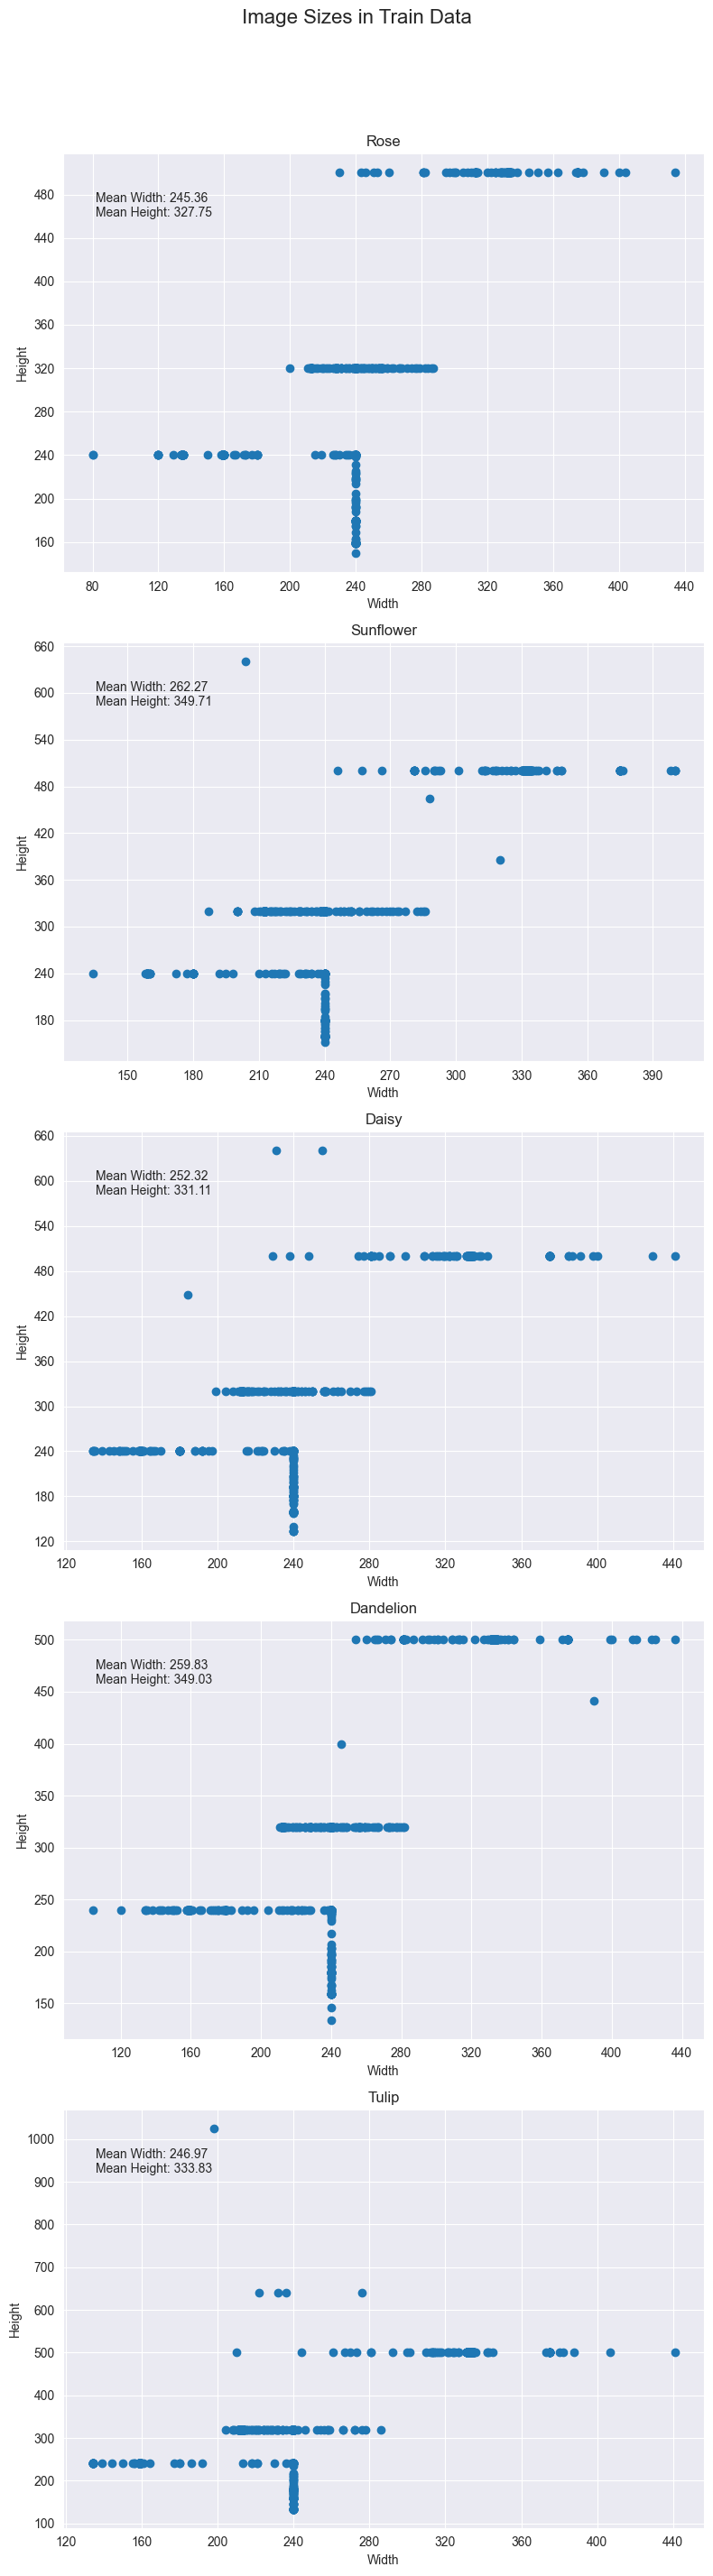

In [15]:
from matplotlib.ticker import MaxNLocator


train_directory = my_data_dir+'/train_data/'


flowers = ['rose', 'sunflower', 'daisy', 'dandelion', 'tulip']


fig, axs = plt.subplots(len(flowers), figsize=(8, 6 * len(flowers)))

for i, flower in enumerate(flowers):
   
    flower_path = os.path.join(train_directory, flower)
    
   
    sizes = []
    for image_file in os.listdir(flower_path):
        image_path = os.path.join(flower_path, image_file)
        img = plt.imread(image_path)
        sizes.append(img.shape)
    
    
    axs[i].scatter([size[0] for size in sizes], [size[1] for size in sizes], label=flower)
    axs[i].set_title(flower.capitalize())
    axs[i].set_xlabel('Width')
    axs[i].set_ylabel('Height')
    axs[i].xaxis.set_major_locator(MaxNLocator(integer=True))
    axs[i].yaxis.set_major_locator(MaxNLocator(integer=True))
    
   
    mean_width = np.mean([size[0] for size in sizes])
    mean_height = np.mean([size[1] for size in sizes])
    axs[i].text(0.05, 0.85, f'Mean Width: {mean_width:.2f}\nMean Height: {mean_height:.2f}', transform=axs[i].transAxes)

plt.suptitle('Image Sizes in Train Data', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [16]:
train_directory = my_data_dir+'/train_data/'


flowers = ['rose', 'sunflower', 'daisy', 'dandelion', 'tulip']


all_widths = []
all_heights = []

for flower in flowers:
   
    flower_path = os.path.join(train_directory, flower)
    

    for image_file in os.listdir(flower_path):
        image_path = os.path.join(flower_path, image_file)
        img = plt.imread(image_path)
        height, width, _ = img.shape
        all_widths.append(width)
        all_heights.append(height)


mean_width = int(np.mean(all_widths))
mean_height = int(np.mean(all_heights))

# Creating a common shape
common_shape = (mean_height, mean_width)

print("Common Shape:", common_shape)

Common Shape: (253, 338)


In [17]:
image_shape = (299, 299,3)

In [18]:
#ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split = 0.3,
    fill_mode='nearest'
)

#test_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
img_height = 299
img_width = 299
batch_size = 32

In [20]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb',
    subset="training",
    class_mode='categorical'
)

validation_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
     color_mode='rgb',
    subset="validation",
    class_mode='categorical'
)

#seed=123

Found 2420 images belonging to 5 classes.
Found 1033 images belonging to 5 classes.


In [21]:
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Dropout
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape,  activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))


model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
          
model.add(Dense(5, activation='softmax'))

          
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])   

early_stop = EarlyStopping(monitor='val_loss',patience=8)

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 297, 297, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 148, 148, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 148, 148, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 128)       7

In [23]:
results = model.fit(train_data,epochs=40,
                    validation_data=validation_data,
                    callbacks=[early_stop])

Epoch 1/40
76/76 [==============================] - 147s 2s/step - loss: 1.8440 - accuracy: 0.2876 - val_loss: 1.5117 - val_accuracy: 0.3204
Epoch 2/40
76/76 [==============================] - 99s 1s/step - loss: 1.3572 - accuracy: 0.4070 - val_loss: 1.2978 - val_accuracy: 0.4366
Epoch 3/40
76/76 [==============================] - 98s 1s/step - loss: 1.2409 - accuracy: 0.4550 - val_loss: 1.2614 - val_accuracy: 0.4482
Epoch 4/40
76/76 [==============================] - 98s 1s/step - loss: 1.1967 - accuracy: 0.4773 - val_loss: 1.1587 - val_accuracy: 0.5179
Epoch 5/40
76/76 [==============================] - 98s 1s/step - loss: 1.1498 - accuracy: 0.5095 - val_loss: 1.0898 - val_accuracy: 0.5286
Epoch 6/40
76/76 [==============================] - 98s 1s/step - loss: 1.1267 - accuracy: 0.5310 - val_loss: 1.0964 - val_accuracy: 0.5508
Epoch 7/40
76/76 [==============================] - 100s 1s/step - loss: 1.0753 - accuracy: 0.5669 - val_loss: 1.0449 - val_accuracy: 0.5595
Epoch 8/40
76/76 [

In [24]:
summary = pd.DataFrame(model.history.history)
summary.tail(10)

,loss,accuracy,val_loss,val_accuracy
30,0.683,0.750,0.705,0.747
31,0.685,0.743,0.758,0.732
32,0.656,0.749,0.800,0.712
33,0.666,0.766,0.723,0.767
34,0.667,0.761,0.695,0.747
35,0.649,0.761,0.738,0.739
36,0.621,0.771,0.676,0.742
37,0.622,0.770,0.672,0.749
38,0.628,0.778,0.802,0.685
39,0.650,0.764,0.747,0.729


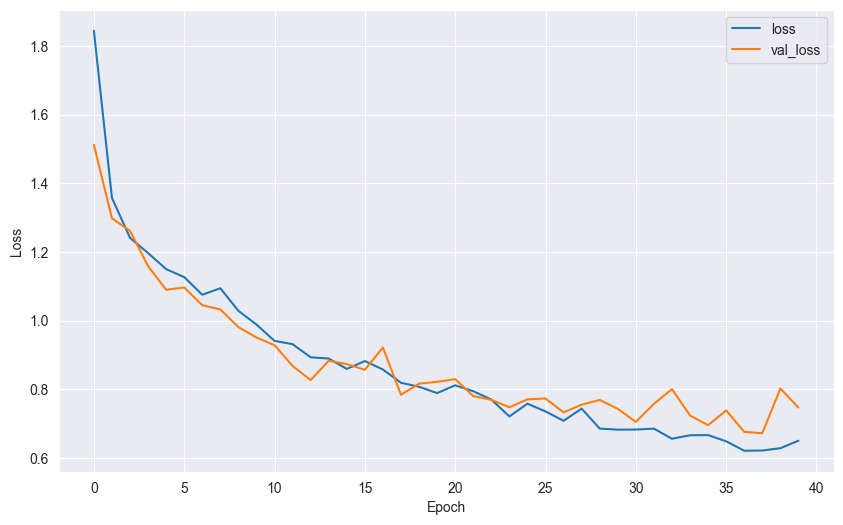

In [25]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

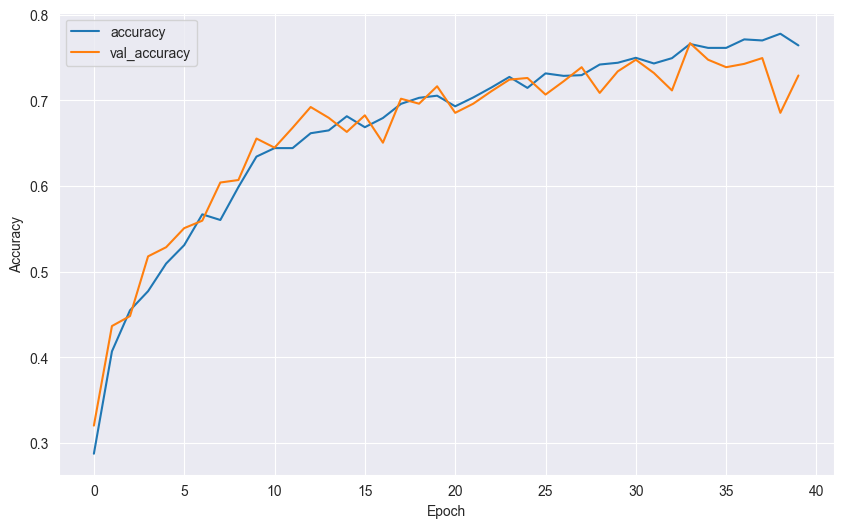

In [26]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [32]:
train_results=model.evaluate(train_data)
print("Train Loss, Train Accuracy:", train_results)

76/76 [==============================] - 69s 899ms/step - loss: 0.5807 - accuracy: 0.7893
Train Loss, Train Accuracy: [0.5806597471237183, 0.78925621509552]


In [33]:
val_results = model.evaluate(validation_data)
print("Validation Loss, Validation Accuracy:", val_results)

33/33 [==============================] - 28s 825ms/step - loss: 0.7107 - accuracy: 0.7435
Validation Loss, Validation Accuracy: [0.7106637954711914, 0.7434656620025635]


In [34]:
val_predictions = model.predict(validation_data)
val_pred_classes = np.argmax(val_predictions, axis=1)
true_classes = validation_data.classes
class_labels = list(validation_data.class_indices.keys())

33/33 [==============================] - 28s 842ms/step


In [30]:
predictions = pred_probabilities > 0.5
predictions[:50]

array([[False, False, False,  True, False],
       [ True, False, False, False, False],
       [False, False,  True, False, False],
       [False, False, False, False, False],
       [False, False, False, False,  True],
       [False, False,  True, False, False],
       [False, False, False, False,  True],
       [ True, False, False, False, False],
       [False, False,  True, False, False],
       [False, False, False, False,  True],
       [False, False, False,  True, False],
       [ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False, False, False,  True],
       [False, False, False, False,  True],
       [False, False, False,  True, False],
       [False, False,  True, False, False],
       [False, False, False, False, False],
       [False, False, False,  True, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False,  True, False, False],
       [False, False, False,  Tr

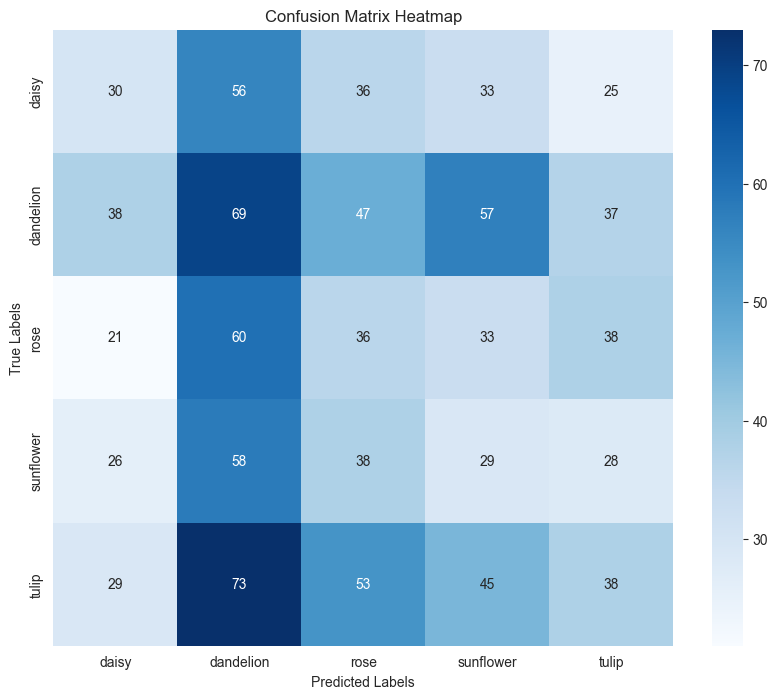

In [35]:
conf_matrix = confusion_matrix(true_classes, val_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()